In [1]:
import pandas as pd
import numpy as np


In [2]:
LOG_DIR = "./data/slippageLog.csv"

df = pd.read_csv(LOG_DIR, dtype=float)
stETH_percent = df["poolb1"] / (df["poolb0"] + df["poolb1"])

print(df)


            price            dy        poolb0        poolb1  ethPercent
0    1.819797e+12  1.843751e+21  6.332237e+23  3.395353e+22      9491.0
1    1.775150e+12  1.797161e+21  6.314262e+23  3.495353e+22      9475.0
2    1.734043e+12  1.754317e+21  6.296715e+23  3.595353e+22      9459.0
3    1.696113e+12  1.714827e+21  6.279564e+23  3.695353e+22      9444.0
4    1.661038e+12  1.678349e+21  6.262777e+23  3.795353e+22      9428.0
..            ...           ...           ...           ...         ...
796  2.486985e+10  2.499647e+19  4.051443e+21  8.299535e+23        48.0
797  2.461958e+10  2.474440e+19  4.026694e+21  8.309535e+23        48.0
798  2.437284e+10  2.449590e+19  4.002193e+21  8.319535e+23        47.0
799  2.412959e+10  2.425091e+19  3.977937e+21  8.329535e+23        47.0
800  2.388974e+10  2.400936e+19  3.953923e+21  8.339535e+23        47.0

[801 rows x 5 columns]


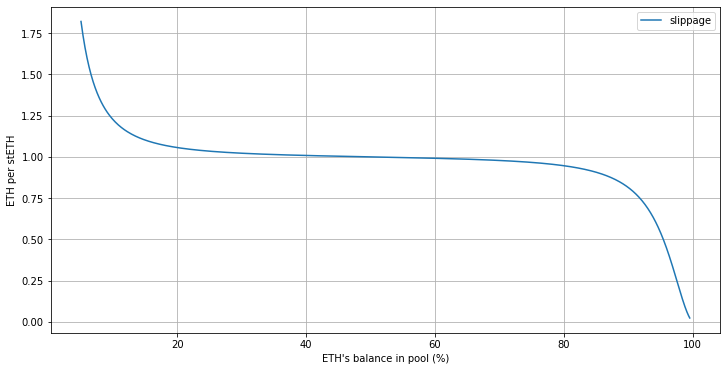

In [27]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)


ax.set_xlabel("ETH's balance in pool (%)")
ax.set_ylabel("ETH per stETH")
line_slippage, = ax.plot(stETH_percent * 100, df['price'] / 1e12, label="slippage")
ax.grid()

ax.legend(handles=[line_slippage], loc='upper right')
plt.show()

In [4]:

def attackCost(from_percent, to_percent):
    '''calculate how many stETH need from a percent to another percent'''
    from_percent = from_percent * 100 // 1
    to_percent = to_percent * 100 // 1
    _df = df[df["ethPercent"] < from_percent]
    _df = _df[_df["ethPercent"] >= to_percent]
    # print(_df)
    amountIn = _df.shape[0] * 1000 # every row amountIn is 1000
    amountOut = _df['dy'].sum() / 1e18
    
    return  _df["price"].max() / 1e12, _df["price"].min() / 1e12, _df["ethPercent"].max() / 100, _df["ethPercent"].min() / 100, amountIn, amountOut

for i in range(20,6,-2):
    price_upper, price_lower, percent_upper, percent_lower, cost, reward = attackCost(from_percent=i*1.0, to_percent=(i-2)*1.0)
    print("percent from {:.2f}% to {:.2f}% cost stETH {:.2f} get ETH {:.2f} price from {:.4f} to {:.4f}".format(percent_upper, percent_lower, cost, reward, price_upper, price_lower))


percent from 19.86% to 18.10% cost stETH 13000.00 get ETH 12227.33 price from 0.9454 to 0.9345
percent from 17.95% to 16.07% cost stETH 14000.00 get ETH 12971.88 price from 0.9334 to 0.9179
percent from 15.92% to 14.08% cost stETH 14000.00 get ETH 12701.74 price from 0.9165 to 0.8955
percent from 13.94% to 12.01% cost stETH 15000.00 get ETH 13197.76 price from 0.8936 to 0.8623
percent from 11.88% to 10.04% cost stETH 15000.00 get ETH 12602.01 price from 0.8596 to 0.8153
percent from 9.91% to 8.08% cost stETH 16000.00 get ETH 12508.32 price from 0.8115 to 0.7442
percent from 7.97% to 6.04% cost stETH 19000.00 get ETH 13077.64 price from 0.7389 to 0.6264


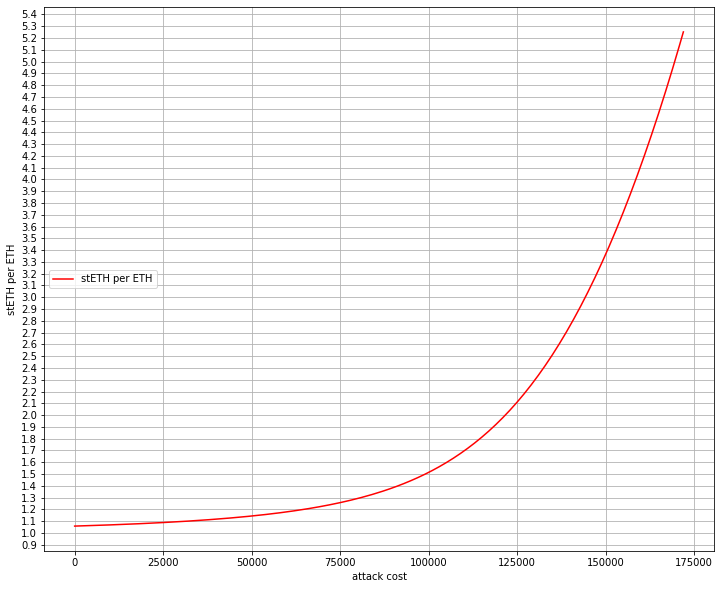

In [26]:
# data from 20% to 0.5%
df2 = df[df["ethPercent"] < 2000]
df2 = df2[df2["ethPercent"] >= 200]

fig,ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(10)

ax.set_xlabel("attack cost")
ax.set_ylabel("stETH per ETH")

ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

# ax2 = ax.twinx()
# ax2.set_ylabel("ETH per stETH")

line_ETH, = ax.plot((df2.index - df2.index[0]) * 1000, 1e12 / df2['price'],  'r', label="stETH per ETH",)
# line_stETH, = ax2.plot((df2.index - df2.index[0]) * 1000, df2['price'] / 1e12, 'b', label="ETH per stETH")


ax.legend( handles=[line_ETH], loc='center left')
ax.grid()
plt.show()